## Descrição do desafio

O problema proposto usa como base quatro datasets, cada um contendo dados de empresas abrangendo todos os tipos e setores. O primeiro dataset contem os dados de todas as empresas a serem analisadas; os outros três são subsets do primeiro e se referem ao portifolio de empresas que prestam serviços as empresas dos respectivos portifolios.

O objetivo do desafio é criar um modelo que faça recomendações de possíveis leads para as empresas que prestam serviço baseado em seus portifolios.

## Imports

In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import do dataset geral
EM = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_market.csv')

# Import dos Dados de Portifolio
P1 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio1.csv')
P2 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio2.csv')
P3 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio3.csv')

## Análise Exploratória

In [3]:
EM.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
P1.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,...,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.0,0.0,4
2,2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,...,39.454762,91.2,19.333333,14.0,15.0,25.0,-6.666667,-44.0,0.0,3


In [5]:
P2.head()

,Unnamed: 0,id
0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


In [6]:
P3.head()

,Unnamed: 0,id
0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,1,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3,3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4,4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...


In [7]:
EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float64(144), int64(2), object(27)
memory usage: 614.1+ MB


In [8]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
EM.dtypes

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

In [9]:
# Frequencia de valores faltantes nas colunas
Nan_Ratio = pd.DataFrame((EM.isna().sum())/(len(EM))).sort_values(by=0,ascending=False)
Nan_Ratio = Nan_Ratio.rename(columns={0:'NaN Ratio'})
Nan_Ratio

,NaN Ratio
grau_instrucao_macro_desconhecido,1.000000
qt_alteracao_socio_180d,1.000000
qt_alteracao_socio_365d,1.000000
qt_alteracao_socio_total,1.000000
qt_alteracao_socio_90d,1.000000
idade_media_coligadas_baixadas,0.999706
coligada_mais_antiga_baixada,0.999706
coligada_mais_nova_baixada,0.999706
vl_total_veiculos_antt,0.999619
vl_total_tancagem,0.999394


In [10]:
# Filtrando colunas com menos de 30% de valoress faltantes
colunas = list(Nan_Ratio[Nan_Ratio['NaN Ratio']<0.3].index)
del colunas[27:29]
colunas = sorted(colunas)
colunas.insert(0,'id')
EM = EM[colunas]
EM.head()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,dt_situacao,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,idade_empresa_anos,natureza_juridica_macro,nm_divisao,nm_meso_regiao,nm_micro_regiao,nm_segmento,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,setor,sg_uf,sg_uf_matriz,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,INDUSTRIA DA CONSTRUCAO,ACIMA DE 1 ANO,VERDE,2005-03-25,False,True,False,False,True,False,False,False,True,True,SIM,False,False,False,False,True,False,10 a 15,14.457534,ENTIDADES EMPRESARIAIS,CONSTRUCAO DE EDIFICIOS,LESTE POTIGUAR,NATAL,CONSTRUCAO,23.0,0,2.0,2.0,0.0,CONSTRUÇÃO CIVIL,RN,RN,3132172.8,3132172.8,0.0,0.0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",EMPRESARIO INDIVIDUAL,BAIXA,SERVICOS DE ALOJAMENTO/ALIMENTACAO,ATE 1 ANO,CINZA,2017-05-12,False,True,False,False,True,False,True,NaN,NaN,True,SIM,False,False,False,False,True,False,1 a 5,1.463014,OUTROS,ALIMENTACAO,CENTRO NORTE PIAUIENSE,TERESINA,ALOJAMENTO E ALIMENTACAO,9.0,0,1.0,1.0,0.0,SERVIÇO,PI,PI,210000.0,210000.0,0.0,0.0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,"ATE R$ 81.000,00","ATE R$ 81.000,00",EMPRESARIO INDIVIDUAL,MEDIA,"TRANSPORTE, ARMAZENAGEM E CORREIO",ACIMA DE 1 ANO,AMARELO,2011-09-26,False,False,False,False,True,False,True,True,True,True,SIM,False,False,False,False,True,False,5 a 10,7.093151,OUTROS,TRANSPORTE TERRESTRE,CENTRO AMAZONENSE,MANAUS,TRANSPORTE ARMAZENAGEM E CORREIO,26.0,0,1.0,1.0,0.0,SERVIÇO,AM,AM,50000.0,50000.0,0.0,0.0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",EMPRESARIO INDIVIDUAL,MEDIA,SERVICOS DIVERSOS,ACIMA DE 1 ANO,AMARELO,2012-04-25,False,True,False,False,True,False,False,False,True,True,SIM,False,False,False,False,True,False,5 a 10,6.512329,OUTROS,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,CENTRO AMAZONENSE,MANAUS,OUTRAS ATIVIDADES DE SERVICOS,26.0,0,1.0,1.0,0.0,SERVIÇO,AM,AM,210000.0,210000.0,0.0,0.0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",EMPRESARIO INDIVIDUAL,ALTA,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",ACIMA DE 1 ANO,VERDE,2015-08-17,False,True,False,False,True,False,False,False,True,True,SIM,False,False,False,False,True,False,1 a 5,3.200000,OUTROS,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,LESTE POTIGUAR,NATAL,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,27.0,0,1.0,1.0,0.0,SERVIÇO,RN,RN,210000.0,210000.0,0.0,0.0


In [11]:
EM.select_dtypes(exclude=['int64','float64']).describe()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,dt_situacao,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,natureza_juridica_macro,nm_divisao,nm_meso_regiao,nm_micro_regiao,nm_segmento,setor,sg_uf,sg_uf_matriz
count,462298,434785,434785,462298,451130,462298,447447,447447,462292,460371,462298,462298,462298,462298,462298,462298,379585,379585,460371,462298,462298,460371,460371,462298,462298,460371,462298,462298,460371,403600,403600,460371,460371,462298,460359
unique,462298,12,11,67,4,33,5,6,7334,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,7,87,19,73,21,5,6,27
top,681bf203f47b6837190730cb399775c318e703e01ed60f...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",EMPRESARIO INDIVIDUAL,MEDIA,COMERCIO VAREJISTA,ACIMA DE 1 ANO,VERDE,2005-11-03,False,False,False,False,True,False,False,False,True,True,NAO,False,False,False,False,True,False,1 a 5,OUTROS,COMERCIO VAREJISTA,CENTRO AMAZONENSE,MANAUS,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,COMERCIO,MA,MA
freq,1,273861,252602,295756,217949,172404,378896,145430,69465,457095,256228,462298,461056,433232,461083,311398,285545,199617,264741,236779,453866,460030,460091,462230,335468,429687,138580,320211,172404,71469,60008,211224,211224,127654,124823


In [12]:
EM.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,462298.000000,417022.000000,462298.000000,347207.000000,347207.000000,347207.000000,4.347850e+05,4.347850e+05,460371.000000,460371.000000
mean,9.948677,25.007247,28.737044,1.496326,1.476681,0.019645,8.020911e+05,3.367205e+08,48.699177,3.591801
std,9.615664,9.679799,468.626094,3.276626,3.258079,0.195166,3.099979e+07,7.114614e+09,1206.696804,72.600352
min,0.016438,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,4.104703e+04,0.000000,0.000000
25%,2.756164,22.000000,0.000000,1.000000,1.000000,0.000000,1.648512e+05,1.854576e+05,0.000000,0.000000
50%,6.704110,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,14.465753,25.000000,0.000000,2.000000,2.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,106.432877,66.000000,9647.000000,246.000000,246.000000,13.000000,1.454662e+10,2.227618e+11,122090.000000,9782.000000


In [13]:
# Filtrando IDs dos portifolios no dataset principal
EM_P1 = EM[EM['id'].isin(list(P1['id']))]
EM_P2 = EM[EM['id'].isin(list(P2['id']))]
EM_P3 = EM[EM['id'].isin(list(P3['id']))]

In [14]:
EM_P1.select_dtypes(exclude=['int64','float64']).describe()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,dt_situacao,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,natureza_juridica_macro,nm_divisao,nm_meso_regiao,nm_micro_regiao,nm_segmento,setor,sg_uf,sg_uf_matriz
count,555,530,530,555,551,555,544,544,555,555,555,555,555,555,555,555,454,454,555,555,555,555,555,555,555,555,555,555,555,491,491,555,555,555,555
unique,555,7,9,6,4,2,3,6,416,2,2,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,6,2,8,19,66,2,3,6,7
top,160046e34dae0f72ad2ba2d27828806691d299f058dc15...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",EMPRESARIO INDIVIDUAL,MEDIA,COMERCIO VAREJISTA,ACIMA DE 1 ANO,VERDE,2005-11-03,False,False,False,False,True,False,False,False,True,False,NAO,False,False,False,False,True,False,1 a 5,OUTROS,COMERCIO VAREJISTA,CENTRO AMAZONENSE,MANAUS,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,COMERCIO,MA,MA
freq,1,325,296,432,280,496,453,167,100,551,300,555,555,519,553,337,316,286,442,311,546,555,555,555,400,517,157,447,496,78,65,496,496,157,156


In [15]:
EM_P1.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,555.000000,508.000000,555.000000,408.000000,408.000000,408.000000,5.300000e+02,5.300000e+02,555.000000,555.000000
mean,10.139247,24.771654,1.236036,1.279412,1.272059,0.007353,3.218504e+05,6.359388e+06,0.542342,0.861261
std,9.641625,9.969729,16.288026,0.654125,0.647811,0.110593,1.005342e+06,1.165307e+08,8.502044,16.312180
min,0.052055,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,5.000000e+04,0.000000,0.000000
25%,2.924658,22.000000,0.000000,1.000000,1.000000,0.000000,5.000000e+04,5.000000e+04,0.000000,0.000000
50%,6.709589,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,15.494521,25.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,47.517808,54.000000,374.000000,9.000000,9.000000,2.000000,2.019427e+07,2.660064e+09,199.000000,382.000000


In [16]:
EM_P2.select_dtypes(exclude=['int64','float64']).describe()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,dt_situacao,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,natureza_juridica_macro,nm_divisao,nm_meso_regiao,nm_micro_regiao,nm_segmento,setor,sg_uf,sg_uf_matriz
count,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,496,496,566,566,566,566
unique,566,6,6,26,3,29,1,5,207,2,2,1,2,1,2,1,1,2,2,2,2,2,2,2,2,2,3,4,60,18,60,19,5,6,6
top,fb9ff020426e8a7d7e6e4c8a4c6a4b0142883d0dca709b...,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",ACIMA DE 1 ANO,VERDE,2005-11-03,False,False,False,False,True,False,False,False,False,True,SIM,False,False,False,False,True,True,> 20,ENTIDADES EMPRESARIAIS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,CENTRO AMAZONENSE,MANAUS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,SERVIÇO,AM,AM
freq,1,278,247,287,523,163,566,376,201,474,304,566,562,566,564,566,566,539,490,307,543,565,539,564,307,490,379,323,163,138,126,163,336,142,142


In [17]:
EM_P2.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,566.000000,566.000000,566.000000,382.000000,382.000000,382.000000,5.660000e+02,5.660000e+02,566.000000,566.000000
mean,26.987691,24.752650,3.434629,3.099476,2.921466,0.178010,8.104888e+07,9.989964e+07,11.726148,10.408127
std,11.638360,5.923012,11.803635,7.236576,7.221585,0.491116,2.220549e+08,3.030362e+08,31.275328,36.865715
min,10.038356,21.000000,0.000000,1.000000,1.000000,0.000000,1.001471e+07,1.001471e+07,0.000000,0.000000
25%,17.832192,23.000000,0.000000,2.000000,2.000000,0.000000,1.850712e+07,2.020403e+07,1.000000,0.000000
50%,23.402740,23.000000,1.000000,2.000000,2.000000,0.000000,3.040626e+07,3.492982e+07,4.000000,1.000000
75%,38.628082,23.000000,2.000000,3.000000,3.000000,0.000000,6.331316e+07,7.511236e+07,10.000000,7.000000
max,55.126027,49.000000,172.000000,139.000000,139.000000,3.000000,3.490930e+09,4.663801e+09,371.000000,663.000000


In [18]:
EM_P3.select_dtypes(exclude=['int64','float64']).describe()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,dt_situacao,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,natureza_juridica_macro,nm_divisao,nm_meso_regiao,nm_micro_regiao,nm_segmento,setor,sg_uf,sg_uf_matriz
count,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,263,263,265,265,265,265,265,265,265,265,265,265,265,241,241,265,265,265,265
unique,265,6,6,25,3,16,3,5,129,2,2,1,2,1,1,1,1,2,1,2,2,2,2,1,2,2,6,4,26,19,56,13,1,6,6
top,16843c9ffb920170477118933798510d8d5f00f5c56c12...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",MUNICIPIO,ALTA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",ACIMA DE 1 ANO,VERDE,2005-11-03,False,False,False,False,True,False,False,False,False,True,NAO,False,False,False,False,False,True,> 20,OUTROS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,NORTE MARANHENSE,MANAUS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,SERVIÇO,MA,MA
freq,1,138,135,108,236,150,263,159,85,253,147,265,264,265,265,265,263,252,265,145,260,264,255,265,133,221,176,128,150,41,38,150,265,74,74


In [19]:
EM_P3.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,265.000000,264.000000,265.000000,98.000000,98.000000,98.000000,2.650000e+02,2.650000e+02,265.000000,265.000000
mean,27.762502,24.738636,2.554717,4.010204,3.755102,0.255102,1.080079e+08,1.141512e+08,10.675472,7.784906
std,14.119603,6.241333,12.010011,13.927274,13.918067,0.736546,1.926276e+08,2.017062e+08,32.952220,23.765325
min,0.761644,9.000000,0.000000,1.000000,1.000000,0.000000,2.003972e+07,2.003972e+07,0.000000,0.000000
25%,17.638356,23.000000,0.000000,2.000000,2.000000,0.000000,3.060050e+07,3.142476e+07,1.000000,0.000000
50%,24.073973,23.000000,0.000000,2.000000,2.000000,0.000000,5.100084e+07,5.579183e+07,3.000000,1.000000
75%,43.800000,23.000000,1.000000,3.000000,2.000000,0.000000,9.978650e+07,1.086451e+08,8.000000,6.000000
max,51.808219,49.000000,172.000000,139.000000,139.000000,5.000000,2.011597e+09,2.015451e+09,371.000000,215.000000


## Data pre-processing

In [20]:
# Mantém colunas relevantes para o problema
EM = EM[['id',
         'de_faixa_faturamento_estimado',
         'de_saude_tributaria',
         'idade_emp_cat',
         'sg_uf',
         'nm_divisao',
         'de_natureza_juridica']]

# Valores faltantes na coluna nm_divisao foram dropados
EM = EM.dropna(subset = ['nm_divisao'])
EM = EM.reset_index(drop=True)

# Valores faltantes na coluna de faixa de faturamento foram preenchidos com a moda da coluna
EM['de_faixa_faturamento_estimado'] = EM['de_faixa_faturamento_estimado'].fillna('DE R$ 81.000,01 A R$ 360.000,00')

# 90% dos dados faltantes em de_saude_tributaria pertenciam a empresas com menos de 1 ano de atuação
# Foram preenchidos como opção 'CINZA'
EM['de_saude_tributaria'] = EM['de_saude_tributaria'].fillna('CINZA')

EM_P1 = EM[EM['id'].isin(list(P1['id']))]
EM_P2 = EM[EM['id'].isin(list(P2['id']))]
EM_P3 = EM[EM['id'].isin(list(P3['id']))]

In [21]:
# Criando dataset para encoding
EM_enc = EM

# Label Encoder das colunas categoricas ordinais
EM_enc['de_faixa_faturamento_estimado'] = EM_enc['de_faixa_faturamento_estimado'].map({'SEM INFORMACAO':0,
    'ATE R$ 81.000,00':1,'DE R$ 81.000,01 A R$ 360.000,00':2,'DE R$ 360.000,01 A R$ 1.500.000,00':3,
    'DE R$ 1.500.000,01 A R$ 4.800.000,00':4,'DE R$ 4.800.000,01 A R$ 10.000.000,00':5,
    'DE R$ 10.000.000,01 A R$ 30.000.000,00':6,'DE R$ 30.000.000,01 A R$ 100.000.000,00':7,
    'DE R$ 100.000.000,01 A R$ 300.000.000,00':8,'DE R$ 300.000.000,01 A R$ 500.000.000,00':9,
    'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS':10,'ACIMA DE 1 BILHAO DE REAIS':11})

EM_enc['de_saude_tributaria'] = EM_enc['de_saude_tributaria'].map({'VERDE':0,'AZUL':1,'AMARELO':2,'CINZA':3,
    'LARANJA':4,'VERMELHO':5})

EM_enc['idade_emp_cat'] = EM_enc['idade_emp_cat'].map({'<= 1':0,'1 a 5':1,'5 a 10':2,'10 a 15':3,'15 a 20':4,'> 20':5})

# Hashing Encoder das colunas categoricas não ordinais
HE = ce.HashingEncoder(n_components=10, cols=['sg_uf','nm_divisao','de_natureza_juridica'])
EM_enc = HE.fit_transform(EM_enc)
EM_enc = EM_enc[['id',
                 'de_faixa_faturamento_estimado',
                 'de_saude_tributaria',
                 'idade_emp_cat',
                 'col_0',
                 'col_1',
                 'col_2',
                 'col_3',
                 'col_4',
                 'col_5',
                 'col_6',
                 'col_7',
                 'col_8',
                 'col_9']]

## Modelo e Avaliação

In [22]:
train_P1, test_P1 = train_test_split(EM_P1, test_size=0.3, shuffle=False)
train_P2, test_P2 = train_test_split(EM_P2, test_size=0.3, shuffle=False)
train_P3, test_P3 = train_test_split(EM_P3, test_size=0.3, shuffle=False)

n_test_P1 = EM.drop(EM_P1.index)
n_test_P2 = EM.drop(EM_P2.index)
n_test_P3 = EM.drop(EM_P3.index)

EM_P1_num = EM_enc[EM_enc['id'].isin(list(train_P1['id']))].drop(labels='id',axis=1)
EM_P2_num = EM_enc[EM_enc['id'].isin(list(train_P2['id']))].drop(labels='id',axis=1)
EM_P3_num = EM_enc[EM_enc['id'].isin(list(train_P3['id']))].drop(labels='id',axis=1)
EM_num = EM_enc.drop(labels='id',axis=1)

In [23]:
# função que retorna F1 score, TPR (true positive rate) e FPR (false positive rate)
def F1(leads_P,test_P,n_leads_P,n_test_P):
    TP = leads_P.isin(test_P['id']).sum()
    FP = leads_P.isin(n_test_P['id']).sum()
    TN = n_leads_P.isin(n_test_P['id']).sum()
    FN = n_leads_P.isin(test_P['id']).sum()
    # condição para evitar divisão por zero
    if TP == 0.0:
        P = 0.0
        R = 0.0
        TPR = 0.0
        FPR = FP/(FP+TN)
        ACC = 0.0
        F1 = 0.0
    else:
        P = TP/(TP+FP)
        R = TP/(TP+FN)
        TPR = R
        FPR = FP/(FP+TN)
        ACC = (TP+TN)/(TP+TN+FP+FN)
        F1 = (2*P*R)/(P+R)
    return (F1,ACC,TPR,FPR,TP,FP,TN,FN)

In [24]:
# calcula F1, TPR e FPR para diferentes valores de threshold
def ROC(DF_portifolio,test,n_test):
    TPR = []
    FPR = []
    for t in [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2500,5000,10000,45000]:
        leads,n_leads = KNN(DF_portifolio,t)
        TPR.append(F1(leads,test,n_leads,n_test)[2])
        FPR.append(F1(leads,test,n_leads,n_test)[3])
    # plot da curva ROC
    roc_auc = metrics.auc(FPR, TPR)
    plt.title('Receiver Operating Characteristic')
    plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [25]:
def KNN(DF_portifolio,n_neighbors):
    aux=[]
    nn = NearestNeighbors(n_neighbors=n_neighbors, 
                          algorithm='ball_tree', 
                          leaf_size=len(EM_num)/1.5, 
                          metric='hamming',
                          n_jobs=-1)
    nn.fit(EM_num)
    indice = nn.kneighbors(X=DF_portifolio,return_distance=False)
    for i in range(0,len(indice)):
        for j in range(0,len(indice[i])):
            aux.append(indice[i][j])
    indice = set(aux)
    leads = [x for x in indice if x not in list(DF_portifolio.index)]
    n_leads = EM['id'].drop(index=leads)
    leads = EM['id'].loc[leads]
    return (leads,n_leads)



ROC PORTIFOLIO 1


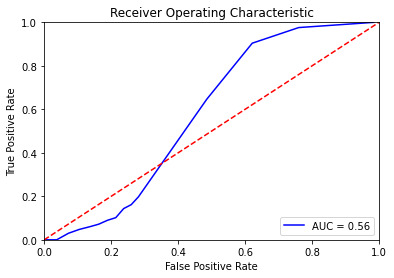

In [26]:
print('\n\nROC PORTIFOLIO 1')
ROC(EM_P1_num,test_P1,n_test_P1)



ROC PORTIFOLIO 2


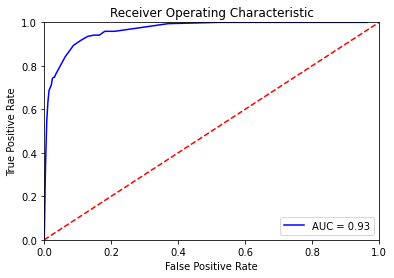

In [27]:
print('\n\nROC PORTIFOLIO 2')
ROC(EM_P2_num,test_P2,n_test_P2)



ROC PORTIFOLIO 3


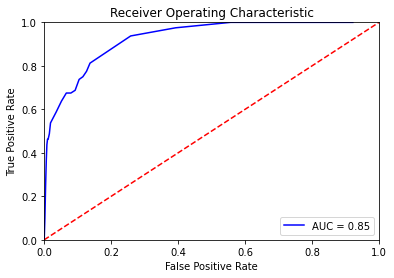

In [28]:
print('\n\nROC PORTIFOLIO 3')
ROC(EM_P3_num,test_P3,n_test_P3)

In [29]:
EM_P1_test = EM_enc[EM_enc['id'].isin(list(EM_P1['id']))].drop(labels='id',axis=1)
EM_P2_test = EM_enc[EM_enc['id'].isin(list(EM_P2['id']))].drop(labels='id',axis=1)
EM_P3_test = EM_enc[EM_enc['id'].isin(list(EM_P3['id']))].drop(labels='id',axis=1)

In [47]:
leads_P1,n = KNN(EM_P1_test,10)
leads_P2,n = KNN(EM_P2_test,10)
leads_P3,n = KNN(EM_P3_test,10)

In [48]:
leads_P1

2         4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
6         8bf37c178778e537b108e58bf20552abe10c3a7fae129b...
16391     9009459bb65bc8d162bb4569c6b887c649ae1b138ae941...
10        5e88eba292754550f48fb752318a0ebbbf8c46e8480531...
32784     d512871f4ccf6a07fcfe690a1ee1681099c022ff116150...
                                ...                        
16343     31fc7163fb05a1c734334cf39b71829c21fcbc7fa298e5...
8154      ab46e734f28f5ec4784f1aea500e58fa7613cd6564dc89...
8160      5e8ac0fe3fb39255ed8cf1d71c3658fbd612843dd89639...
49125     c58b901d975378abd23ca6d4e0419e7c2a99dc6c817b5d...
221176    dcd848d8db5094071828eac3e8ffd75c63c3d6a68d8c15...
Name: id, Length: 2192, dtype: object

In [49]:
leads_P2

114698    ad9c54af80c8ad020603f1a730f014b91ea390e3f9dff4...
12        ae7aa54603064698a34a870f9e06364ae63466b55e914d...
139277    93b6c7b92651007bbdfd455f006ac8a42de9960e61d6ba...
114703    d7c7b0bc3b4e341fa30f773a68093837652f4e5f11d74a...
16401     f748c4dfe3c31ee9467946195e60c587ba2ba796dd95ff...
                                ...                        
229345    47ec4fe6bf88c8717e17d5be9492b5ba7e49717bba3cf6...
16363     5fc7094a7b95e0bcd0fc7e6c9d9dce150c0fb01e8beb9e...
81903     a2789d55e7b09e98f46de82593e2820ff9936a547a5967...
40950     dcd330ced0e24071461b07a0ea3f7cc26055ad4d2e1fc8...
65526     b9e9e6588d3cb4d404345f13a5446abb2f34de3665cd46...
Name: id, Length: 2106, dtype: object

In [50]:
leads_P3

114698    ad9c54af80c8ad020603f1a730f014b91ea390e3f9dff4...
12        ae7aa54603064698a34a870f9e06364ae63466b55e914d...
139277    93b6c7b92651007bbdfd455f006ac8a42de9960e61d6ba...
16401     f748c4dfe3c31ee9467946195e60c587ba2ba796dd95ff...
40982     c4064b40228bc6abf09274f1414e6c19723130780e2f3b...
                                ...                        
204763    be13261e94cc356b73e612ad97cc7fdfa2998f3e70db5d...
98271     eb2f5dd1e83170fe2d490ed0f42be2da503693e68de971...
16363     5fc7094a7b95e0bcd0fc7e6c9d9dce150c0fb01e8beb9e...
16369     88f4c92657805a776b369cb267e029d8fc8f902484e3a6...
16383     5c93c36fd30ba15d041ae825543f63584d47d2370d6708...
Name: id, Length: 1326, dtype: object